# Importing libraries

In [85]:
import os
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importing IRIS dataset

In [86]:
path_to_input_file = os.path.join(os.getcwd(), 'iris_data.csv')

iris_data = pd.read_csv(path_to_input_file)
iris_data

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Identifying missing values, if any

In [87]:
iris_data.isna().any()

sepallength    False
sepalwidth     False
petallength    False
petalwidth     False
class          False
dtype: bool

### No missing values found in the dataset

# Visualizing the dataset

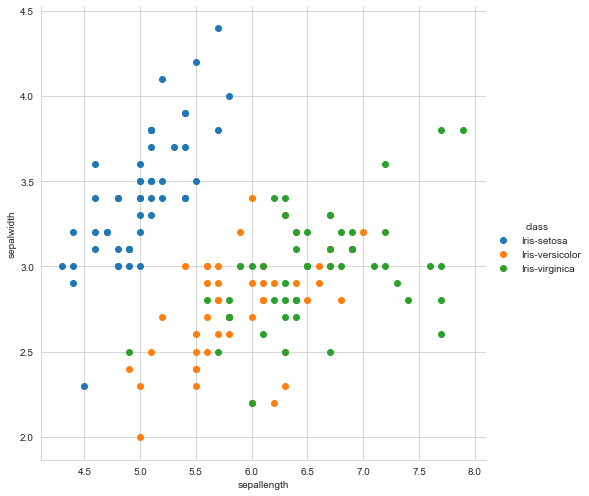

In [88]:
sns.set_style("whitegrid")
sns.FacetGrid(iris_data, hue="class", height=7).map(plt.scatter, "sepallength", "sepalwidth").add_legend()
plt.show()

### Closely observing the plot, we can clearly see the setosa flower species(blue dots) are well separated from the other two species versicolor(orange) and virginica(green)

# Separating features and class variables

In [89]:
y = iris_data['class']
iris_data_features = ['sepallength', 'sepalwidth', 'petallength', 'petalwidth']
X = iris_data[iris_data_features]

In [90]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: class, Length: 150, dtype: object

In [91]:
X.head()

,sepallength,sepalwidth,petallength,petalwidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# Splitting test and training data

In [92]:
# the random_state argument guarantees we get the same split every time we run the cell
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

# Training a Logistic regression model for classification

In [93]:
model = LogisticRegression(solver='liblinear', C=10.0, multi_class='ovr', random_state=0)
model.fit(train_X, train_y)

LogisticRegression(C=15.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2', random_state=0,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [94]:
y_pred = model.predict(val_X)

In [95]:
model.score(train_X, train_y)

0.9910714285714286

In [96]:
model.score(val_X, val_y)

0.9210526315789473

In [97]:
confusion_matrix(val_y, y_pred)

array([[13,  0,  0],
       [ 0, 13,  3],
       [ 0,  0,  9]], dtype=int64)